## Xác định hệ số tương quan 

In [31]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('shopping_trends.csv')
df['Subscription Status'] = df['Subscription Status'].map({'Yes': 1, 'No': 0})
df['Gender']=df['Gender'].map({'Male': 1, 'Female': 0})
df['Promo Code Used']=df['Promo Code Used'].map({'Yes': 1, 'No': 0})
df['Discount Applied']=df['Discount Applied'].map({'Yes': 1, 'No': 0})

frequency_order = ['Weekly', 'Fortnightly', 'Bi-Weekly', 'Monthly', 'Quarterly', 'Every 3 Months', 'Annually']

encoder = OrdinalEncoder(categories=[frequency_order])

df['Frequency of Purchases Encoded'] = encoder.fit_transform(df[['Frequency of Purchases']])

print(df[['Frequency of Purchases', 'Frequency of Purchases Encoded']].head())


  Frequency of Purchases  Frequency of Purchases Encoded
0            Fortnightly                             1.0
1            Fortnightly                             1.0
2                 Weekly                             0.0
3                 Weekly                             0.0
4               Annually                             6.0


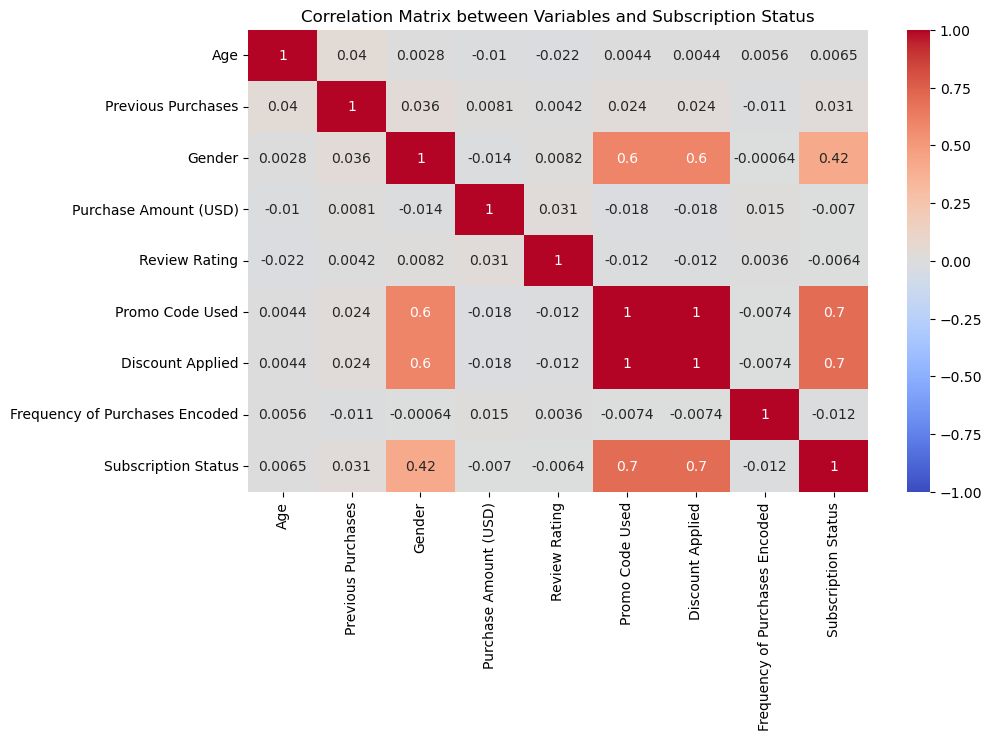

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# DẠNG SỐ ĐÃ MÃ HÓA 
correlation_columns = ['Age','Previous Purchases','Gender','Purchase Amount (USD)', 'Review Rating','Promo Code Used', 'Discount Applied'
                 ,'Frequency of Purchases Encoded','Subscription Status']


corr_matrix = df[correlation_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Variables and Subscription Status')
plt.show()


**Phân tích kết quả**

**Age**: 0.0065 (Mối tương quan gần như không có)

**Gender**: 0.42 (Mối tương quan dương trung bình, có sự ảnh hưởng)

**Purchase Amount (USD)**: -0.007 (Mối tương quan rất yếu, gần như không ảnh hưởng)

**Review Rating**: -0.0064 (Mối tương quan gần như không có)

**Promo Code Used**: 0.7 (Mối tương quan dương mạnh, ảnh hưởng lớn)

**Discount Applied**: 0.7 (Mối tương quan dương mạnh, ảnh hưởng lớn)

**Previous Purchases**: 0.031 (Mối tương quan rất yếu)

**Frequency of Purchases (Encoded)**: -0.012 (Mối tương quan rất yếu)

### Insights: 
**Promo Code Used và Discount Applied** có mối tương quan mạnh nhất với Subscription Status. Điều này cho thấy rằng những khách hàng sử dụng mã khuyến mãi hoặc được giảm giá có khả năng đăng ký cao hơn.

**Gender** có mối tương quan trung bình với Subscription Status, có nghĩa là giới tính của khách hàng cũng có ảnh hưởng đáng kể đến khả năng đăng ký.

Các yếu tố như **Age, Purchase Amount (USD), Review Rating, Previous Purchases, và Frequency of Purchases** đều có hệ số tương quan rất thấp, cho thấy rằng những yếu tố này không có ảnh hưởng đáng kể đến việc khách hàng có đăng ký dịch vụ hay không.